<a href="https://colab.research.google.com/github/nv-github1/my-repo1/blob/master/Capstone_Proj_Nandita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# 2. Mount Google Drive (you will be asked to allow access)
from google.colab import drive
drive.mount('/content/drive')

# 3. Load the dataset from your Google Drive
# Replace the path below with your actual file path in Google Drive
# Example: if the file is in "My Drive/BikeEase/FloridaBikeRentals.csv"

file_path = "/content/drive/MyDrive/datascience/FloridaBikeRentals.csv"

df = pd.read_csv(file_path, encoding="latin1")

# inspect the data, show data types, show first 10 rows,
# show rows and columns and col names
print(df.head(10))
print(df.shape)
print(df.columns)
print(df.info())

Mounted at /content/drive
         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0             -5.2           37   
1  01-12-2017                204     1             -5.5           38   
2  01-12-2017                173     2             -6.0           39   
3  01-12-2017                107     3             -6.2           40   
4  01-12-2017                 78     4             -6.0           36   
5  01-12-2017                100     5             -6.4           37   
6  01-12-2017                181     6             -6.6           35   
7  01-12-2017                460     7             -7.4           38   
8  01-12-2017                930     8             -7.6           37   
9  01-12-2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000        

In [3]:

# 4. Look at the data
print("First 15 rows:")
print(df.head(15))

print("\nShape of dataset (rows, columns):")
print(df.shape)

print("\nColumn names and data types:")
print(df.dtypes)

# 5. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# ---- STEP 5: Handle missing values ----
# If numerical columns have missing values, we can fill them with the mean.
#df["Temperature(°C)"].fillna(df["Temperature(°C)"].mean(), inplace=True)
#df["Humidity(%)"].fillna(df["Humidity(%)"].mean(), inplace=True)
#df["Wind speed (m/s)"].fillna(df["Wind speed (m/s)"].mean(), inplace=True)

df["Temperature(°C)"] = df["Temperature(°C)"].fillna(df["Temperature(°C)"].mean())
df["Humidity(%)"] = df["Humidity(%)"].fillna(df["Humidity(%)"].mean())
df["Wind speed (m/s)"] = df["Wind speed (m/s)"].fillna(df["Wind speed (m/s)"].mean())


# If categorical columns have missing values, we can fill them with the most common value (mode)

#for col in df.select_dtypes(include="object"):
 #  df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include="object"):
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n No missing values remain!")

# Checking the data types
print(df.dtypes)

# Saving the cleaned data to the JSON file
df.to_json("bike_rental_cleaned.json", orient="records")

print("\n Data is now cleaned and has been saved to bike_rental_cleaned.json")



First 15 rows:
          Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0   01-12-2017                254     0             -5.2           37   
1   01-12-2017                204     1             -5.5           38   
2   01-12-2017                173     2             -6.0           39   
3   01-12-2017                107     3             -6.2           40   
4   01-12-2017                 78     4             -6.0           36   
5   01-12-2017                100     5             -6.4           37   
6   01-12-2017                181     6             -6.6           35   
7   01-12-2017                460     7             -7.4           38   
8   01-12-2017                930     8             -7.6           37   
9   01-12-2017                490     9             -6.5           27   
10  01-12-2017                339    10             -3.5           24   
11  01-12-2017                360    11             -0.5           21   
12  01-12-2017                449   

In [4]:

#print("\nThese are the data types before optimization:")
#print(df.dtypes)

# we can try changing numerical columns from float64 to float32 to use less memory
# We tried this out in breakout room last week

#num_cols = ["Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)"]
#df[num_cols] = df[num_cols].astype("float32")

# also change integer columns to int32 to use lesser memory like above

#df["Rented Bike Count"] = df["Rented Bike Count"].astype("int32")

# Change category-like columns to 'category' datatype - this part was suggested
# by ChatGPT when I asked if anything can be done for optimizing this

#cat_cols = ["Seasons", "Holiday", "Functioning Day"]
#for col in cat_cols:
#    df[col] = df[col].astype("category")

#print("\n tried and optimized different data types!")
#print(df.dtypes)



In [5]:
# multiply Temperature by 10 for standardization
df["Temperature(°C)"] = df["Temperature(°C)"] * 10

# scaling the Visibility between 0 and 1 (MinMax scaling)
df["Visibility (10m)"] = (df["Visibility (10m)"] - df["Visibility (10m)"].min()) / \
                         (df["Visibility (10m)"].max() - df["Visibility (10m)"].min())

print("\n Transformations have been completed!")

# viewing the summary for selected columns
print("\n Statistical summary for key columns:")
print(df[["Temperature(°C)", "Humidity(%)", "Rented Bike Count"]].describe())

# Holiday, Seasons, Functioning day - cannot be used for stats analysing as they are not numbers but categories

# saving the standardized processed data
df.to_csv("bike_rental_processed.csv", index=False)
print("\n The standardized and processed data has been saved to bike_rental_processed.csv")




 Transformations have been completed!

 Statistical summary for key columns:
       Temperature(°C)  Humidity(%)  Rented Bike Count
count      8760.000000  8760.000000        8760.000000
mean        128.829224    58.226256         704.602055
std         119.448252    20.362413         644.997468
min        -178.000000     0.000000           0.000000
25%          35.000000    42.000000         191.000000
50%         137.000000    57.000000         504.500000
75%         225.000000    74.000000        1065.250000
max         394.000000    98.000000        3556.000000

 The standardized and processed data has been saved to bike_rental_processed.csv


In [6]:
# Identify categorical and numerical variables
categorical = df.select_dtypes(include="object").columns
numerical = df.select_dtypes(include=["int64", "float64"]).columns

print("Categorical variables:", list(categorical))
print("Numerical variables:", list(numerical))

Categorical variables: ['Date', 'Seasons', 'Holiday', 'Functioning Day']
Numerical variables: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [7]:
# Average rentals by season
season_avg = df.groupby("Seasons")["Rented Bike Count"].mean()
print("\nAverage rentals by season:")
print(season_avg)





Average rentals by season:
Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64


In [8]:

# Average rentals by holiday
holiday_avg = df.groupby("Holiday")["Rented Bike Count"].mean()
print("\nAverage rentals by holiday:")
print(holiday_avg)




Average rentals by holiday:
Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64


In [9]:
# Average rentals by functioning day
function_avg = df.groupby("Functioning Day")["Rented Bike Count"].mean()
print("\nAverage rentals by functioning day:")
print(function_avg)




Average rentals by functioning day:
Functioning Day
No       0.000000
Yes    729.156999
Name: Rented Bike Count, dtype: float64


In [10]:
# Distribution: Rented Bike Count by Hour
temp_hour_dist = df.pivot_table(values="Rented Bike Count", index="Hour", aggfunc="mean")
print("\nAverage rentals by hour:")
print(temp_hour_dist.head())




Average rentals by hour:
      Rented Bike Count
Hour                   
0            541.460274
1            426.183562
2            301.630137
3            203.331507
4            132.591781


In [11]:
# Distribution: Seasons and Rented Bike Count
season_dist = df.groupby("Seasons")["Rented Bike Count"].mean()
print("\nAverage rentals by season:")
print(season_dist)


Average rentals by season:
Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64


In [12]:
# Encoding - converting text columns (categories) into numeric columns (0s and 1s)
encoded_df = pd.get_dummies(df, columns=["Seasons", "Holiday", "Functioning Day"])

# Saving the new version to Rental_Bike_Data_Dummy.csv
encoded_df.to_csv("Rental_Bike_Data_Dummy.csv", index=False)
print("\n Encoded data saved to Rental_Bike_Data_Dummy.csv")

print(df.head())
print()
print(encoded_df.head())




 Encoded data saved to Rental_Bike_Data_Dummy.csv
         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0            -52.0           37   
1  01-12-2017                204     1            -55.0           38   
2  01-12-2017                173     2            -60.0           39   
3  01-12-2017                107     3            -62.0           40   
4  01-12-2017                 78     4            -60.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2               1.0                      -17.6   
1               0.8               1.0                      -17.6   
2               1.0               1.0                      -17.7   
3               0.9               1.0                      -17.6   
4               2.3               1.0                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0  

This feature of including Text is so cool. I am using this for the first time!

I tried and did the following -

> Data Cleaning:

* I filled missing numeric values with mean
* I filled missing text values with mode
* removed any duplicates
* removed any empty rows

> Data Optimization:

* I tried changing data types to save memory (float32, int32, category) to see  how optimization works.. but then it was just for trying purposes.
We did for float in our breakout room on Monday, 6th Oct.

> Transformations:

* Temperature * 10
* used the scaling formula {X_scaled = (X - X_min) / (X_max - X_min)}
scaled Visibility between the range 0 and 1

> Statistical Findings:

* the factors Temperature, Season, and Functioning Day influence the bike rentals
* there is a correlation between warm weather, active days and bike rentals - higher bike rentals is seen on warm weather and active days

> Categorical Trends:

* there is a higher demand for bike rentals on summer and working days
* there is a lower demand for bike rentals on holidays and wet or snowy days





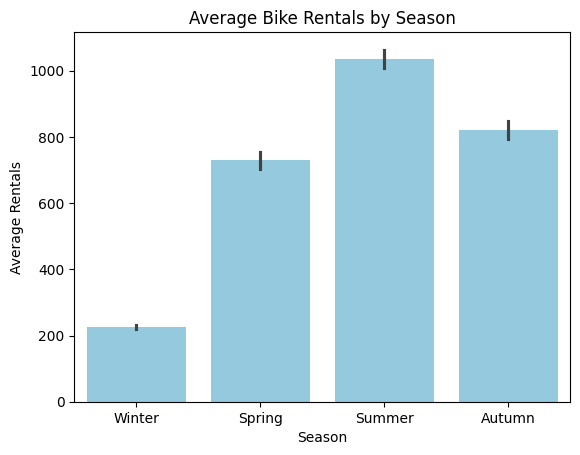

In [13]:
# bar plot

sns.barplot(
    x="Seasons",
    y="Rented Bike Count",
    data=df,
    estimator="mean",
    color="skyblue"
)
plt.title("Average Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.show()

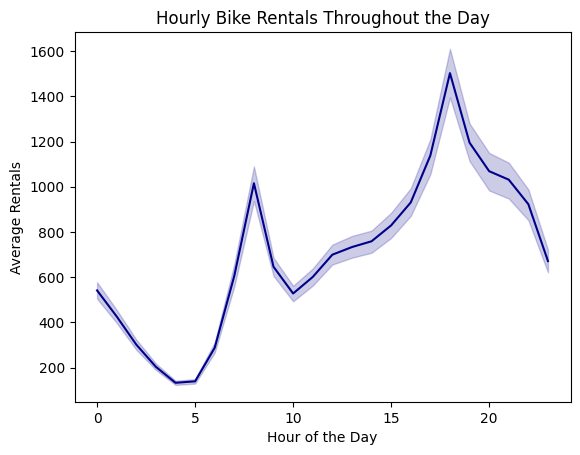

In [14]:
# line plot

sns.lineplot(x="Hour", y="Rented Bike Count", data=df, color="darkblue")
plt.title("Hourly Bike Rentals Throughout the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.show()

The above plot has a shadow around the line. I wanted just the line plot.

I looked up the documentation for it. It says this is called a Confidence interval, that Seaborn adds.
Could you please tell me where this shadowing is used. Thank you.


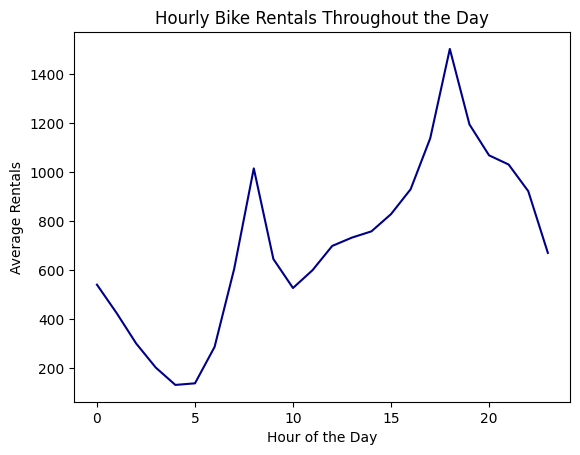

In [20]:
# line plot

# sns.lineplot(x="Hour", y="Rented Bike Count", data=df, color="darkblue", ci=None) gives warning
sns.lineplot(x="Hour", y="Rented Bike Count", data=df, color="darkblue", errorbar=None)
plt.title("Hourly Bike Rentals Throughout the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.show()

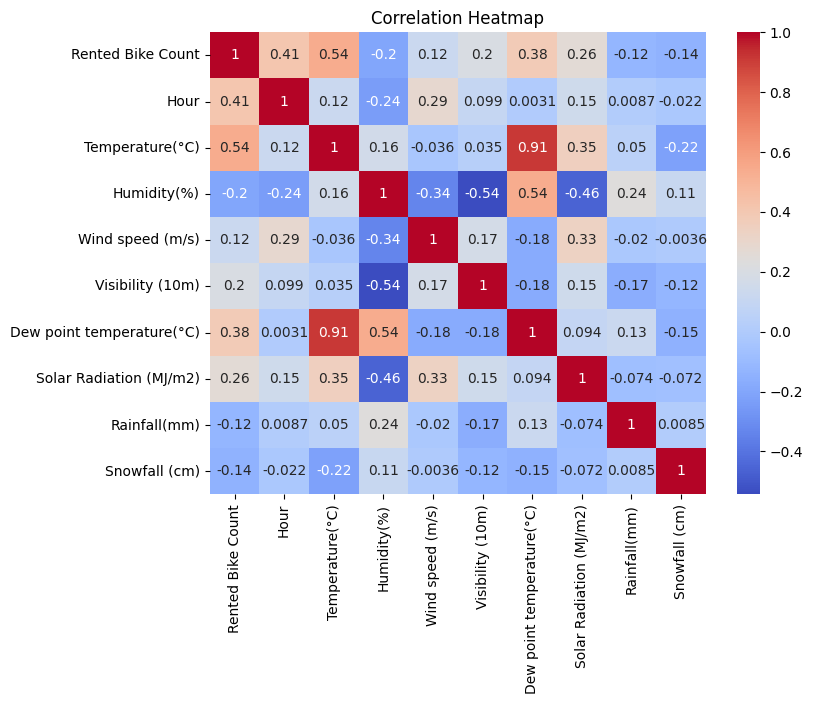

In [16]:
# heat map for correlation between numerical columns
# Temperature and Rented Bike Count show a strong positive correlation — warmer weather means more bike rentals
# Humidity or Rainfall has a negative link — wet or humid weather discourages people from biking
#

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

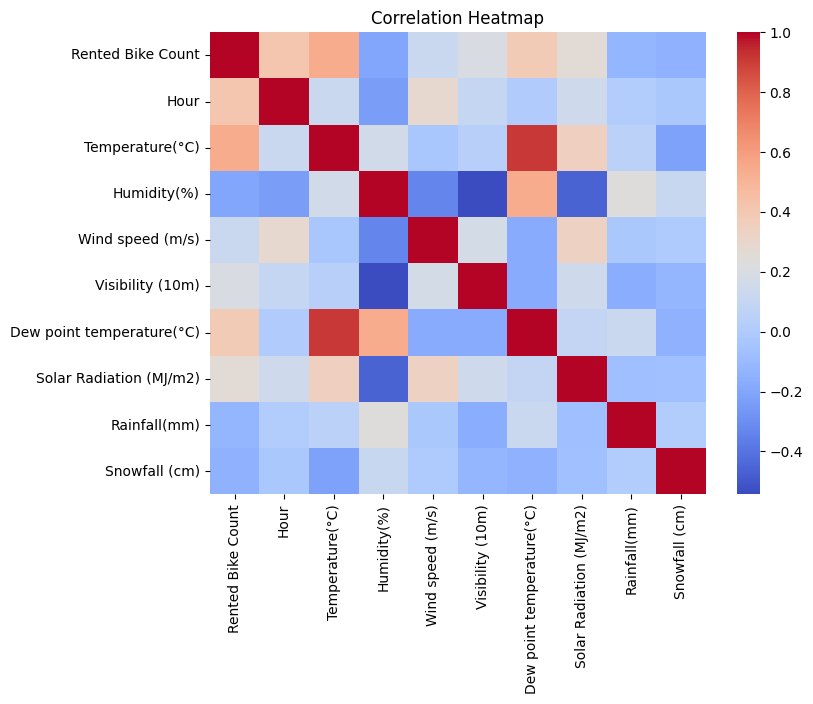

In [17]:
# Trying with annot = False setting to see how it works - heat map for correlation between numerical columns
# Temperature and Rented Bike Count show a strong positive correlation — warmer weather means more bike rentals
# Humidity or Rainfall has a negative link — wet or humid weather discourages people from biking
#
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

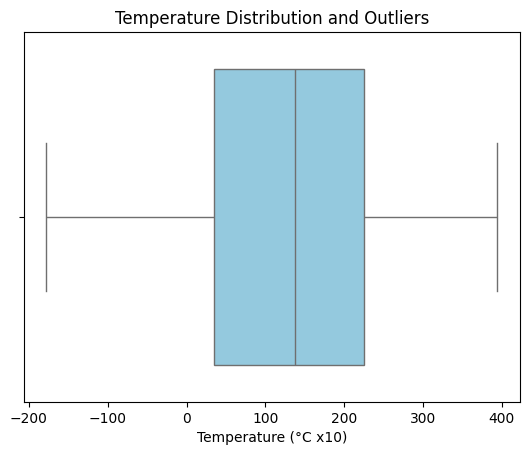

In [18]:
# box plot - temperature

sns.boxplot(x=df["Temperature(°C)"], color="skyblue")
plt.title("Temperature Distribution and Outliers")
plt.xlabel("Temperature (°C x10)")
plt.show()



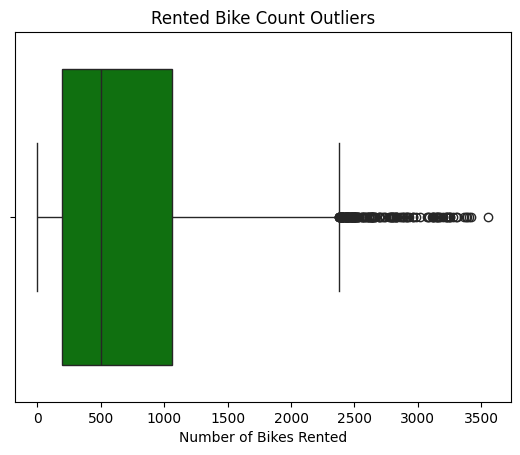

In [19]:
# another box plot - rented bike count

sns.boxplot(x=df["Rented Bike Count"], color="green")
plt.title("Rented Bike Count Outliers")
plt.xlabel("Number of Bikes Rented")
plt.show()


